<a href="https://colab.research.google.com/github/Riccardolotorto/GeoPandasPython/blob/main/GeoPandasES3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt

In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
bici = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip")

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

In [ ]:
bici

In [ ]:
bici.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

In [ ]:
quartieri

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [ ]:
!pip install contextily

In [ ]:
import contextily

In [ ]:
quartieri_mercatore = quartieri.to_crs(3857)
bici_mercatore = bici.to_crs(3857)

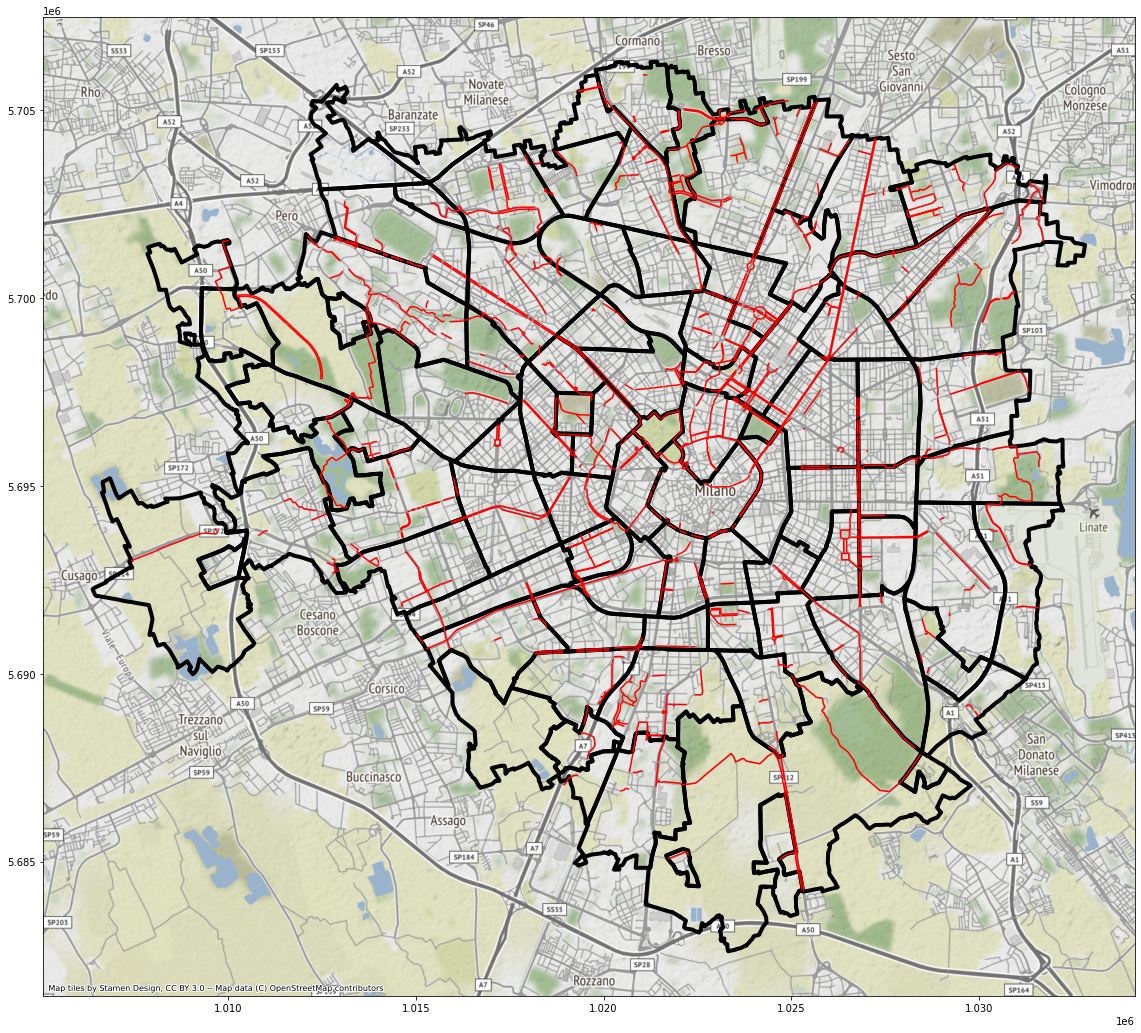

In [ ]:
ax = quartieri_mercatore.plot(figsize = (20, 18), edgecolor = "k", facecolor = "none", linewidth = 4)
bici_mercatore.plot(ax = ax, color = "red")
contextily.add_basemap(ax)

In [ ]:
# calcolare la dimensione media dell'area dei quartieri di Milano
quartieri["Shape_Area"].mean()

2065439.329852197

In [ ]:
# visualizzare i nomi dei quartieri più grandi della media
quartieri_mercatore[quartieri_mercatore["Shape_Area"] > quartieri_mercatore["Shape_Area"].mean()][["NIL"]]

NIL
0      RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
7                   QUARTO OGGIARO - VIALBA - MUSOCCO
10                                 STADIO - IPPODROMI
12                                              DUOMO
27                VILLAPIZZONE - CAGNOLA - BOLDINASCO
28                              PARCO BOSCO IN CITTA'
29                                   GORLA - PRECOTTO
30  NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...
33              TALIEDO - MORSENCHIO - Q.RE FORLANINI
36                                            ASSIANO
41                                    LODI - CORVETTO
47  Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO
48                             MONLUE' - PONTE LAMBRO
50       GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
52                                       FORZE ARMATE
55                                PARCO DELLE ABBAZIE
57                                         BANDE NERE
58                                  LAMBRATE - ORTICA
59  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
63                    CIMIANO - ROTTOLE - Q.RE FELTRE
65           BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA
66                         PARCO FORLANINI - CAVRIANO
69                                             AFFORI
70      BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE
74                       MAGGIORE - MUSOCCO - CERTOSA
76                                       CITTA' STUDI
82                                  PARCO DEI NAVIGLI
86                                            ADRIANO
87                                        LORENTEGGIO

In [ ]:
# visualizzare i quartieri più grandi della media sulla mappa di Milano

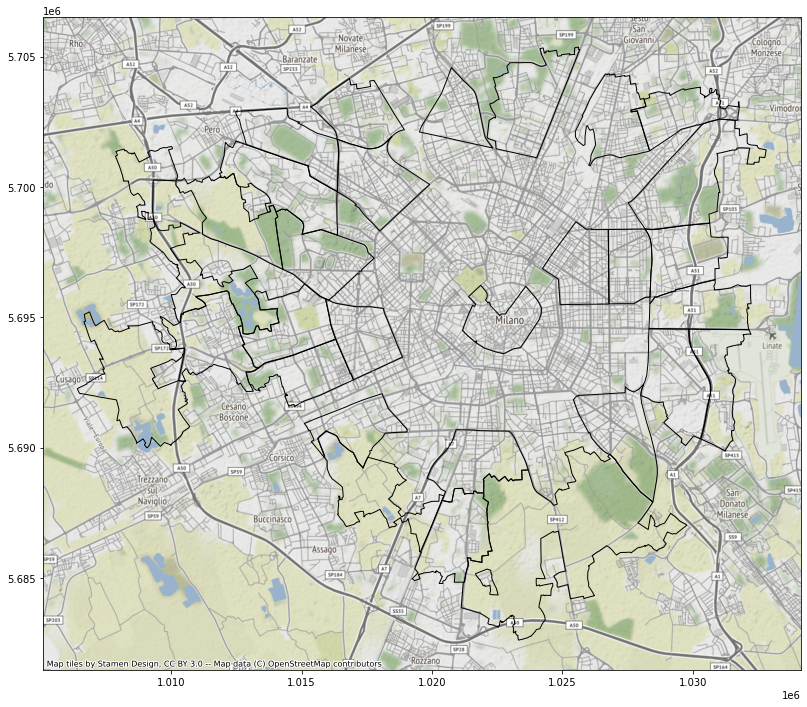

In [ ]:
ax = quartieri_mercatore[quartieri_mercatore["Shape_Area"] > quartieri_mercatore["Shape_Area"].mean()].plot(figsize = (15, 12), edgecolor = "k", facecolor = "none")
contextily.add_basemap(ax)

In [ ]:
# visualizzare una mappa con la legenda in modo che i quartieri più grandi abbiano colori diversi rispetto ai quartieri più piccoli. 
# La scala dei colori deve essere rossa e si deve riuscire ad intravedere in trasparenza la mappa sottostante

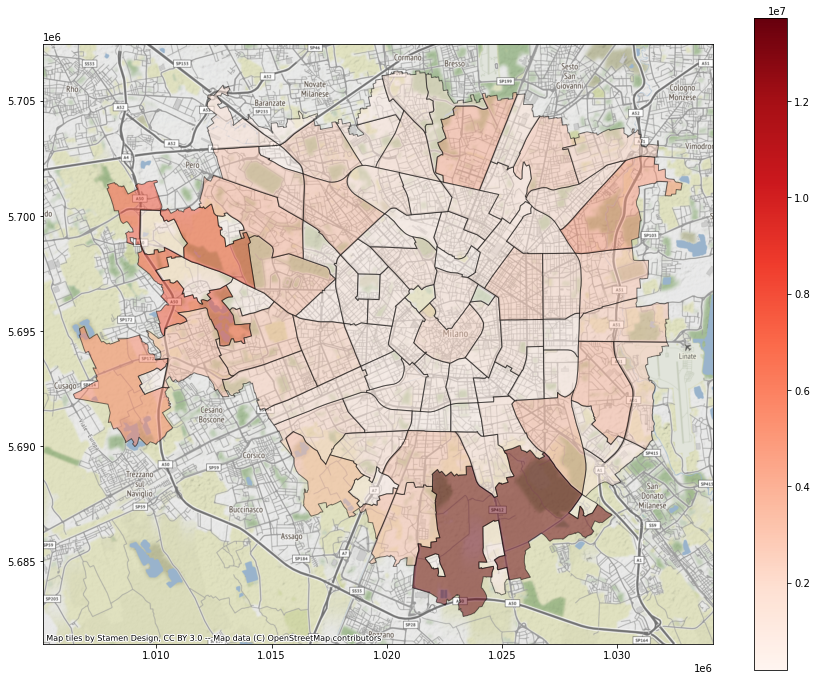

In [ ]:
ax = quartieri_mercatore.plot(figsize = (15, 12), edgecolor = "k", column = "Shape_Area", legend = True, cmap = "Reds", alpha=0.5)
contextily.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Greco, prendendole dal geodataframe dei quartieri

In [ ]:
greco = quartieri_mercatore[quartieri_mercatore["NIL"].str.contains("GRECO")]
greco

ID_NIL              NIL  Valido_dal Valido_al  \
17      13  GRECO - SEGNANO  05/02/2020   Vigente   

                          Fonte   Shape_Leng    Shape_Area  OBJECTID  \
17  Milano 2030 - PGT Approvato  7468.531297  1.768603e+06       106   

                                             geometry  
17  POLYGON ((1025497.262 5702124.897, 1025502.138...

In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Greco

In [ ]:
greco_oggetto = greco.geometry.item()
piste_greco = bici_mercatore[bici_mercatore.intersects(greco_oggetto)]
piste_greco

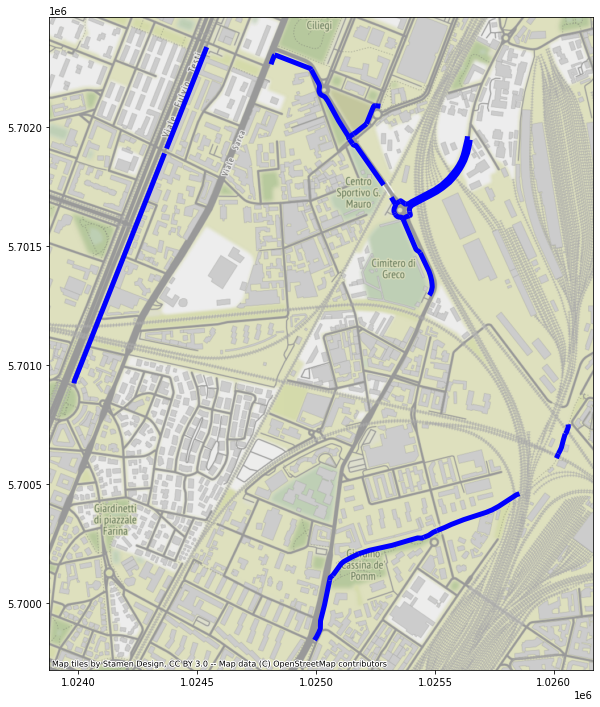

In [ ]:
ax = piste_greco.plot(figsize = (15, 12), edgecolor = "Blue", linewidth = 5)
contextily.add_basemap(ax)

In [ ]:
# visualizzare su una mappa il quartiere di Greco e le piste ciclabili che lo attraversano
# evidenziare bene in nero le piste ciclabili 

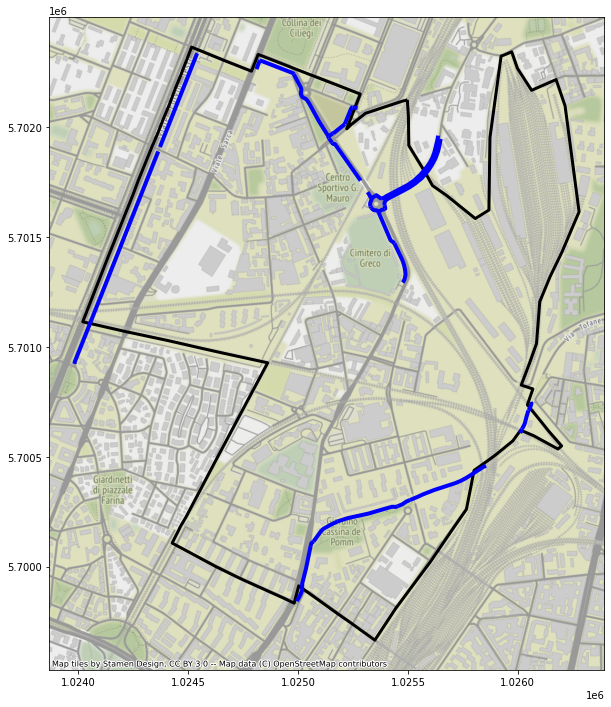

In [ ]:
ax = greco.plot(figsize = (15, 12), edgecolor = "k", facecolor = "none", linewidth = 3)
piste_greco.plot(ax = ax, edgecolor = "Blue", linewidth = 4)
contextily.add_basemap(ax)